# 주차별 영화데이터

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

In [2]:
#연도를 주차별로 환산하는 함수를 만들어주자. 가장 오래된 연도가 2002년 2000년을 기준으로 처리한다.
#15년, 9년, 4년은 53주차까지 있는 주 이므로 반영하여 환산해준다.
def yearToweek(yr):
    yr = yr-2000
    if(yr>15):
        return (yr-1)*52+3
    elif(yr>9):
        return (yr-1)*52+2
    elif(yr>4):
        return (yr-1)*52+1
    else:
        return (yr-1)*52

In [3]:
def dateConvert(date):
    date = date[0:10]
    return date

In [4]:
class datetime_addHoli():
    def __init__(self, datetime):
        self.year = datetime.isocalendar()[0]
        self.month = datetime.month
        self.week = datetime.isocalendar()[1]
        self.day = datetime.isocalendar()[2]

In [5]:
BoxOffice_total = pd.DataFrame()

In [6]:
year = 2018

if year==2015:
    lastWk = 53
elif year==2018:
    lastWk = 32
else:
    lastWk = 52

for i in range(1, lastWk+1):
    sheet = str(i)
    temp = pd.read_excel("{0}.xlsx".format(str(year)), sheet_name=sheet, converters={'openDt':str})
    
    #openDt 결측치 제거
    temp = temp.dropna(subset=['openDt']).reset_index(drop=True)
    openDt = temp.openDt
    openDt = openDt.apply(dateConvert)
    temp['openDt'] = openDt
    
    openYr = []
    openWk = []
    
    for j in temp.index.tolist():
        dt = datetime.strptime(openDt[j], '%Y-%m-%d')
        tempYr = dt.isocalendar()[0]
        tempWk = dt.isocalendar()[1]
        openYr.append(tempYr)
        openWk.append(tempWk)
        
    temp['isoYr'] = pd.Series(openYr)
    temp['isoWk'] = pd.Series(openWk)
    temp['nowYr'] = year
    temp['nowWk'] = i

    #wkNum 만들기
    openYr = temp['isoYr']
    openWk = temp['isoWk']
    nowYr = temp['nowYr']
    nowWk = temp['nowWk']
    
    #연수를 계산한 현재 주차수 - 연수를 계산한 개봉 주차수 = 현재 몇주차?
    wkNum = (nowYr.apply(yearToweek)+nowWk) - (openYr.apply(yearToweek)+openWk)
    temp['wkCnt'] = wkNum
    
    BoxOffice_total = pd.concat([BoxOffice_total, temp], ignore_index=True)
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32


In [14]:
BoxOffice_total = BoxOffice_total[(BoxOffice_total.wkCnt>=0)&(BoxOffice_total.wkCnt<4)]

In [16]:
trainlist = pd.read_csv("trainlist.csv", converters={'movieCd':str})
testlist = pd.read_csv("testlist.csv", converters={'movieCd':str})
#train_match = train[["movieNm", "movieCd"]]

In [21]:
BoxOffice_total.columns

Index(['rank', 'movieNm', 'openDt', 'salesAmt', 'salesShare', 'salesInten',
       'salesChange', 'salesAcc', 'audiCnt', 'audiInten', 'audiChange',
       'audiAcc', 'scrnCnt', 'showCnt', 'repNationNm', 'nationAlt',
       'companyNm', 'isoYr', 'isoWk', 'nowYr', 'nowWk', 'wkCnt'],
      dtype='object')

In [22]:
del BoxOffice_total["rank"]
del BoxOffice_total["salesAcc"]
del BoxOffice_total["audiAcc"]
del BoxOffice_total["scrnCnt"]
del BoxOffice_total["showCnt"]
del BoxOffice_total["repNationNm"]
del BoxOffice_total["nationAlt"]
del BoxOffice_total["companyNm"]

In [23]:
BoxOffice_total

,movieNm,openDt,salesAmt,salesShare,salesInten,salesChange,audiCnt,audiInten,audiChange,isoYr,isoWk,nowYr,nowWk,wkCnt
0,국제시장,2014-12-17,27120029765,0.483,5817915513,0.273,3471300,744752,0.273,2014,51,2015,1,2
1,테이큰 3,2015-01-01,8930451200,0.159,8930451200,1.000,1109140,1109140,1.000,2015,1,2015,1,0
2,마다가스카의 펭귄,2014-12-31,6580252859,0.117,6563160859,383.990,856527,854607,445.108,2015,1,2015,1,0
3,기술자들,2014-12-24,6342171235,0.113,-4693793813,-0.425,825700,-588985,-0.416,2014,52,2015,1,1
4,호빗: 다섯 군대 전투,2014-12-17,3153688741,0.056,-5617894759,-0.640,382472,-635690,-0.624,2014,51,2015,1,2
5,상의원,2014-12-24,1598517500,0.028,-2678213064,-0.626,210050,-327730,-0.609,2014,52,2015,1,1
7,일곱난쟁이,2014-12-24,551609800,0.010,-391726800,-0.415,79030,-51196,-0.393,2014,52,2015,1,1
8,숲속으로,2014-12-24,510940000,0.009,-1540105488,-0.751,70046,-197148,-0.738,2014,52,2015,1,1
10,사랑에 대한 모든 것,2014-12-10,28865700,0.001,-68496500,-0.704,3627,-8637,-0.704,2014,50,2015,1,3
11,"러브, 로지",2014-12-10,25555900,0.000,-109417400,-0.811,3230,-14064,-0.813,2014,50,2015,1,3


In [25]:
movielist = pd.concat([trainlist, testlist], ignore_index=True)

In [32]:
BoxOffice_total = pd.merge(BoxOffice_total, movielist, on=["movieNm", "openDt"], how="left")

In [33]:
BoxOffice_total = BoxOffice_total.dropna(subset=["movieCd"]).reset_index(drop=True)

In [41]:
BoxOffice_total.sort_values(["movieCd","wkCnt"])

,movieNm,openDt,salesAmt,salesShare,salesInten,salesChange,audiCnt,audiInten,audiChange,isoYr,isoWk,nowYr,nowWk,wkCnt,movieCd
497,그날의 분위기,2016-01-14,2832854012,0.117,2803351012,95.019,351563,347795,92.302,2016,2,2016,2,0,20068576
512,그날의 분위기,2016-01-14,1741168200,0.089,-1091685812,-0.385,223189,-128374,-0.365,2016,2,2016,3,1,20068576
529,그날의 분위기,2016-01-14,482967400,0.020,-1258200800,-0.723,66302,-156887,-0.703,2016,2,2016,4,2,20068576
544,그날의 분위기,2016-01-14,50354000,0.001,-432613400,-0.896,6790,-59512,-0.898,2016,2,2016,5,3,20068576
1509,명탐정 코난:감벽의 관,2018-02-14,1186550000,0.023,1176674000,119.145,156706,155495,128.402,2018,7,2018,7,0,20078561
1520,명탐정 코난:감벽의 관,2018-02-14,491775900,0.023,-694774100,-0.586,68370,-88336,-0.564,2018,7,2018,8,1,20078561
1532,명탐정 코난:감벽의 관,2018-02-14,109591400,0.005,-382184500,-0.777,15521,-52849,-0.773,2018,7,2018,9,2,20078561
1545,명탐정 코난:감벽의 관,2018-02-14,2142800,0.000,-107448600,-0.980,296,-15225,-0.981,2018,7,2018,10,3,20078561
207,쥬라기 월드,2015-06-11,16027478183,0.616,16027478183,1.000,1808930,1808930,1.000,2015,24,2015,24,0,20098169
215,쥬라기 월드,2015-06-11,14247572693,0.483,-1779905490,-0.111,1607276,-201654,-0.111,2015,24,2015,25,1,20098169


In [44]:
temp = BoxOffice_total.groupby("movieCd").count().reset_index(drop=False)

0,1,2,3주차가 아닌 영화들은 너무 일찍 내려 3주차를 채우지 못한 영화들 뿐이다.

In [51]:
temp[temp.movieNm!=4]

,movieCd,movieNm,openDt,salesAmt,salesShare,salesInten,salesChange,audiCnt,audiInten,audiChange,isoYr,isoWk,nowYr,nowWk,wkCnt
129,20152866,3,3,3,3,3,3,3,3,3,3,3,3,3,3
134,20153201,3,3,3,3,3,3,3,3,3,3,3,3,3,3


In [53]:
BoxOffice_total[BoxOffice_total.movieCd=="20153201"]

,movieNm,openDt,salesAmt,salesShare,salesInten,salesChange,audiCnt,audiInten,audiChange,isoYr,isoWk,nowYr,nowWk,wkCnt,movieCd
370,트랜스포터: 리퓰드,2015-10-15,912987215,0.040,911275215,532.287,114872,114658,535.785,2015,42,2015,42,0,20153201
379,트랜스포터: 리퓰드,2015-10-15,326779700,0.015,-586207515,-0.642,43088,-71784,-0.625,2015,42,2015,43,1,20153201
389,트랜스포터: 리퓰드,2015-10-15,21840200,0.001,-304939500,-0.933,3071,-40017,-0.929,2015,42,2015,44,2,20153201


# 0 주차 movie

In [54]:
movielist_0 = BoxOffice_total[BoxOffice_total.wkCnt==0]

In [56]:
del movielist_0["salesAmt"]
del movielist_0["salesShare"]
del movielist_0["salesInten"]
del movielist_0["salesChange"]
del movielist_0["audiInten"]
del movielist_0["audiChange"]

In [61]:
train_0 = movielist_0[movielist_0.isoYr<2018]
test_0 = movielist_0[movielist_0.isoYr==2018]

In [90]:
imsi_actorPower = pd.read_csv("imsi_actorPower.csv", converters={"movieCd":str})
imsi_actorPower = imsi_actorPower[["movieCd", "actorPowersum", "actorPowermean"]]

In [93]:
imsi_directorPower = pd.read_csv("imsi_directorPower.csv", converters={"movieCd":str})
imsi_directorPower = imsi_directorPower[["movieCd", "directorPowersum", "directorPowermean"]]

In [80]:
movielist_0# = movielist_0.reset_index(drop=True)

,movieNm,openDt,audiCnt,isoYr,isoWk,nowYr,nowWk,wkCnt,movieCd
0,테이큰 3,2015-01-01,1109140,2015,1,2015,1,0,20143642
1,언브로큰,2015-01-07,202321,2015,2,2015,2,0,20149948
2,패딩턴,2015-01-07,185206,2015,2,2015,2,0,20144523
3,워킹걸,2015-01-07,106080,2015,2,2015,2,0,20147947
4,오늘의 연애,2015-01-14,967715,2015,3,2015,3,0,20142407
5,허삼관,2015-01-14,580858,2015,3,2015,3,0,20131262
6,박물관이 살아있다 : 비밀의 무덤,2015-01-14,554504,2015,3,2015,3,0,20143541
7,극장판 포켓몬스터 XY : 파괴의 포켓몬과 디안시,2015-01-14,177033,2015,3,2015,3,0,20142962
8,아메리칸 스나이퍼,2015-01-14,155910,2015,3,2015,3,0,20143754
9,강남 1970,2015-01-21,995536,2015,4,2015,4,0,20136888


In [92]:
imsi_actorPower

,movieCd,actorPowersum,actorPowermean
0,20068576,20914828.0,7.074756e+06
1,20078561,584762.0,5.847620e+05
2,20098169,2479573.0,8.265243e+05
3,20100211,946615.0,9.466150e+05
4,20130021,66933277.0,8.892655e+06
5,20130566,44803592.0,9.775293e+06
6,20131262,212653217.0,5.556664e+07
7,20133682,42923705.0,3.889056e+06
8,20134798,26819456.0,9.504274e+06
9,20135305,7098943.0,2.336562e+06


In [94]:
imsi_directorPower

,movieCd,directorPowersum,directorPowermean
0,20068576,0.0,0.000000e+00
1,20078561,2287594.0,3.267991e+05
2,20098169,0.0,0.000000e+00
3,20100211,0.0,0.000000e+00
4,20130021,1068205.0,5.341025e+05
5,20130566,0.0,0.000000e+00
6,20131262,270148.0,2.701480e+05
7,20133682,695271.0,3.476355e+05
8,20134798,0.0,0.000000e+00
9,20135305,3728356.0,3.106963e+05


## 데이터 타입 확인

In [76]:
print(movielist_0.dtypes.unique())
movielist_0.select_dtypes(include=['O']).columns.tolist()

[dtype('O') dtype('int64')]


['movieNm', 'openDt', 'movieCd']

In [77]:
print(imsi_actorPower.dtypes.unique())
#movielist_0.select_dtypes(include=['O']).columns.tolist()

[dtype('int64') dtype('float64')]


## 다시 작업시작

In [95]:
movielist_0 = pd.merge(movielist_0, imsi_actorPower, on="movieCd", how="left")
movielist_0 = pd.merge(movielist_0, imsi_directorPower, on="movieCd", how="left")

In [96]:
movielist_0

,movieNm,openDt,audiCnt,isoYr,isoWk,nowYr,nowWk,wkCnt,movieCd,actorPowersum,actorPowermean,directorPowersum,directorPowermean
0,테이큰 3,2015-01-01,1109140,2015,1,2015,1,0,20143642,29133964.0,4.505596e+06,3858824.0,1.286275e+06
1,언브로큰,2015-01-07,202321,2015,2,2015,2,0,20149948,3758342.0,3.758342e+06,0.0,0.000000e+00
2,패딩턴,2015-01-07,185206,2015,2,2015,2,0,20144523,7746134.0,1.623930e+06,0.0,0.000000e+00
3,워킹걸,2015-01-07,106080,2015,2,2015,2,0,20147947,14676586.0,4.856120e+06,1502771.0,5.009237e+05
4,오늘의 연애,2015-01-14,967715,2015,3,2015,3,0,20142407,8728267.0,4.669060e+06,8354646.0,2.784882e+06
5,허삼관,2015-01-14,580858,2015,3,2015,3,0,20131262,212653217.0,5.556664e+07,270148.0,2.701480e+05
6,박물관이 살아있다 : 비밀의 무덤,2015-01-14,554504,2015,3,2015,3,0,20143541,31405053.0,6.856780e+06,10615023.0,2.653756e+06
7,극장판 포켓몬스터 XY : 파괴의 포켓몬과 디안시,2015-01-14,177033,2015,3,2015,3,0,20142962,NaN,NaN,2186565.0,3.123664e+05
8,아메리칸 스나이퍼,2015-01-14,155910,2015,3,2015,3,0,20143754,5671428.0,3.130274e+06,1780204.0,3.560408e+05
9,강남 1970,2015-01-21,995536,2015,4,2015,4,0,20136888,50255929.0,6.950459e+06,10555682.0,2.638920e+06


In [97]:
movie_cFeature = pd.read_csv("categoricalFeature.csv")

In [99]:
del movie_cFeature["movieNm"]

In [114]:
movielist_0 = pd.merge(movielist_0, movie_cFeature, on="movieCd", how="left")

In [105]:
movie_total = pd.read_csv("movie_total.csv", converters={"movieCd":str})

In [108]:
weekDay = movie_total[["movieCd", "wkDay"]]

In [110]:
movielist_0 = pd.merge(movielist_0, weekDay, on="movieCd", how="left")

In [112]:
movielist_0.wkDay = 8 - movielist_0.wkDay

In [113]:
movielist_0.to_csv("movielist_0.csv", index=False)

# 모델

In [116]:
movielist_0.columns

Index(['movieNm', 'openDt', 'audiCnt', 'isoYr', 'isoWk', 'nowYr', 'nowWk',
       'wkCnt', 'movieCd', 'actorPowersum', 'actorPowermean',
       'directorPowersum', 'directorPowermean', 'wkDay', '다양성영화', '상업영화',
       '12세 관람가', '15세 관람가', '전체 관람가', '청소년 관람불가', 'SF', '가족', '공포(호러)',
       '다큐멘터리', '드라마', '멜로/로맨스', '뮤지컬', '미스터리', '범죄', '사극', '서부극(웨스턴)', '스릴러',
       '애니메이션', '액션', '어드벤처', '전쟁', '코미디', '판타지', '남아프리카공화국', '네덜란드', '대만',
       '덴마크', '독일', '러시아', '멕시코', '미국', '벨기에', '스웨덴', '스페인', '아르헨티나', '아이슬란드',
       '아일랜드', '영국', '이탈리아', '인도', '일본', '잉글랜드', '중국', '캐나다', '태국', '프랑스',
       '핀란드', '한국', '호주', '홍콩'],
      dtype='object')

In [118]:
del

,movieNm,openDt,audiCnt,isoYr,isoWk,nowYr,nowWk,wkCnt,movieCd,actorPowersum,...,일본,잉글랜드,중국,캐나다,태국,프랑스,핀란드,한국,호주,홍콩


In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
import math
from __future__ import division
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation, tree, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score

In [139]:
x = movielist_0.actorPowersum.values
y = movielist_0.audiCnt.values

In [143]:
imsi_actorPower[imsi_actorPower.movieCd=="20142962"]

,movieCd,actorPowersum,actorPowermean


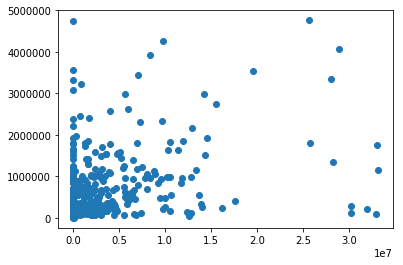

In [137]:
plt.scatter(x, y)

In [159]:
regr = linear_model.LinearRegression()

In [152]:
movielist_0.columns

Index(['movieNm', 'openDt', 'audiCnt', 'isoYr', 'isoWk', 'nowYr', 'nowWk',
       'wkCnt', 'movieCd', 'actorPowersum', 'actorPowermean',
       'directorPowersum', 'directorPowermean', 'wkDay', '다양성영화', '상업영화',
       '12세 관람가', '15세 관람가', '전체 관람가', '청소년 관람불가', 'SF', '가족', '공포(호러)',
       '다큐멘터리', '드라마', '멜로/로맨스', '뮤지컬', '미스터리', '범죄', '사극', '서부극(웨스턴)', '스릴러',
       '애니메이션', '액션', '어드벤처', '전쟁', '코미디', '판타지', '남아프리카공화국', '네덜란드', '대만',
       '덴마크', '독일', '러시아', '멕시코', '미국', '벨기에', '스웨덴', '스페인', '아르헨티나', '아이슬란드',
       '아일랜드', '영국', '이탈리아', '인도', '일본', '잉글랜드', '중국', '캐나다', '태국', '프랑스',
       '핀란드', '한국', '호주', '홍콩'],
      dtype='object')

In [194]:
pearsonr(y_train, train.actorPowersum.values)[0]

0.5554668011793835

In [195]:
pearsonr(y_train, train.actorPowermean.values)[0]

0.3769905369518043

In [196]:
pearsonr(y_train, train.directorPowersum.values)[0]

0.32968567222140516

In [197]:
pearsonr(y_train, train.directorPowermean.values)[0]

0.3864383329637633

In [198]:
pearsonr(y_train, train.wkDay.values)[0]

0.26776149799717514

In [171]:
movielist_0 = movielist_0.dropna(subset=['actorPowersum', 'actorPowermean'])

In [185]:
train

,movieNm,openDt,audiCnt,isoYr,isoWk,nowYr,nowWk,wkCnt,movieCd,actorPowersum,...,일본,잉글랜드,중국,캐나다,태국,프랑스,핀란드,한국,호주,홍콩
0,테이큰 3,2015-01-01,1109140,2015,1,2015,1,0,20143642,29133964.0,...,0,0,0,0,0,0,0,0,0,0
1,언브로큰,2015-01-07,202321,2015,2,2015,2,0,20149948,3758342.0,...,0,0,0,0,0,0,0,0,0,0
2,패딩턴,2015-01-07,185206,2015,2,2015,2,0,20144523,7746134.0,...,0,0,0,0,0,0,0,0,0,0
3,워킹걸,2015-01-07,106080,2015,2,2015,2,0,20147947,14676586.0,...,0,0,0,0,0,0,0,1,0,0
4,오늘의 연애,2015-01-14,967715,2015,3,2015,3,0,20142407,8728267.0,...,0,0,0,0,0,0,0,1,0,0
5,허삼관,2015-01-14,580858,2015,3,2015,3,0,20131262,212653217.0,...,0,0,0,0,0,0,0,1,0,0
6,박물관이 살아있다 : 비밀의 무덤,2015-01-14,554504,2015,3,2015,3,0,20143541,31405053.0,...,0,0,0,0,0,0,0,0,0,0
8,아메리칸 스나이퍼,2015-01-14,155910,2015,3,2015,3,0,20143754,5671428.0,...,0,0,0,0,0,0,0,0,0,0
9,강남 1970,2015-01-21,995536,2015,4,2015,4,0,20136888,50255929.0,...,0,0,0,0,0,0,0,1,0,0
10,빅 히어로,2015-01-21,835582,2015,4,2015,4,0,20149951,5175289.0,...,0,0,0,0,0,0,0,0,0,0


In [172]:
train = movielist_0[movielist_0.isoYr<2018]
test = movielist_0[movielist_0.isoYr>=2018]

In [173]:
x_train = train[['actorPowersum', 'actorPowermean',
       'directorPowersum', 'directorPowermean', 'wkDay', '다양성영화', '상업영화',
       '12세 관람가', '15세 관람가', '전체 관람가', '청소년 관람불가', 'SF', '가족', '공포(호러)',
       '다큐멘터리', '드라마', '멜로/로맨스', '뮤지컬', '미스터리', '범죄', '사극', '서부극(웨스턴)', '스릴러',
       '애니메이션', '액션', '어드벤처', '전쟁', '코미디', '판타지', '남아프리카공화국', '네덜란드', '대만',
       '덴마크', '독일', '러시아', '멕시코', '미국', '벨기에', '스웨덴', '스페인', '아르헨티나', '아이슬란드',
       '아일랜드', '영국', '이탈리아', '인도', '일본', '잉글랜드', '중국', '캐나다', '태국', '프랑스',
       '핀란드', '한국', '호주', '홍콩']].values
y_train = train.audiCnt.values

In [174]:
x_test = test[['actorPowersum', 'actorPowermean',
       'directorPowersum', 'directorPowermean', 'wkDay', '다양성영화', '상업영화',
       '12세 관람가', '15세 관람가', '전체 관람가', '청소년 관람불가', 'SF', '가족', '공포(호러)',
       '다큐멘터리', '드라마', '멜로/로맨스', '뮤지컬', '미스터리', '범죄', '사극', '서부극(웨스턴)', '스릴러',
       '애니메이션', '액션', '어드벤처', '전쟁', '코미디', '판타지', '남아프리카공화국', '네덜란드', '대만',
       '덴마크', '독일', '러시아', '멕시코', '미국', '벨기에', '스웨덴', '스페인', '아르헨티나', '아이슬란드',
       '아일랜드', '영국', '이탈리아', '인도', '일본', '잉글랜드', '중국', '캐나다', '태국', '프랑스',
       '핀란드', '한국', '호주', '홍콩']].values
y_test = test.audiCnt.values

In [187]:
regr.fit(x_train, y_train)
regr.predict(x_test)

array([ 770624.64815274,  572547.76388225,  282440.03598954,
        415139.92572676, 1065551.16698641,  887531.64261953,
       1102902.50341166,  533288.44916705, 2009192.20846237,
        386057.69253111, 1614539.61457715,  757743.4906655 ,
       1019730.71590481, 1046019.20844517,  344577.30602802,
        182679.92149836,  128204.80067162,  465448.87649592,
        516525.97470558,  433894.4066675 ,  981026.11993108,
        583643.46115013,  259034.70338488,  809885.22093661,
        745675.72281067,  415010.03080522, 1005857.55090536,
       1810722.82650139,  658217.86339998, -200078.02527816,
        539150.60565017,  264735.94305521,  -41878.03092686,
       4598260.18118445,  856087.05677548, 1688995.00548066,
        903541.68400219,  270922.22388108,  352903.06465662,
       1694882.31749712,  580660.67144591,  756214.23601336,
        920595.43049367,  336103.6204609 ,  161825.65283678,
       1102118.69865409, 1114604.30340529,  864998.69234986,
        630129.47828778,

In [176]:
regr.score(x_test, y_test)

0.4238810588120677

In [181]:
#Let's try XGboost algorithm to see if we can get better results
xgb1 = xgb.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                      colsample_bytree=1, max_depth=7)

In [182]:
xgb1.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.08, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.75)

In [184]:
predictions = xgb1.predict(x_test)
print(explained_variance_score(y_test, predictions))

0.13668951864864165


In [186]:
pearsonr(y_test, predictions)

(0.46421206478966714, 0.0006006354531644961)

In [192]:
pearsonr(y_test, regr.predict(x_test))

(0.6691739557388445, 7.954557221690539e-08)

In [193]:
from xgboost import plot_importance

In [199]:
trainlist

,movieNm,openDt,movieCd
0,신과함께-죄와 벌,2017-12-20,20150976
1,베테랑,2015-08-05,20148048
2,암살,2015-07-22,20148851
3,택시운전사,2017-08-02,20162869
4,부산행,2016-07-20,20156564
5,어벤져스: 에이지 오브 울트론,2015-04-23,20148493
6,검사외전,2016-02-03,20145507
7,캡틴 아메리카: 시빌 워,2016-04-27,20159364
8,공조,2017-01-18,20151228
9,히말라야,2015-12-16,20136068


In [25]:
test_match = test[["movieNm", "movieCd"]]

In [13]:
train_boxOffice = pd.merge(BoxOffice_total, train_match, on="movieNm", how="left")
train_boxOffice = train_boxOffice.dropna(subset=["movieCd"])

In [26]:
test_boxOffice = pd.merge(BoxOffice_total, test_match, on="movieNm", how="left")
test_boxOffice = test_boxOffice.dropna(subset=["movieCd"])

In [38]:
imsi = train_boxOffice.groupby("movieCd").count().reset_index(drop=False)

In [27]:
imsi2 = test_boxOffice.groupby("movieCd").count().reset_index(drop=False)

In [28]:
test_boxOffice

,rank,movieNm,openDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,...,showCnt,repNationNm,nationAlt,companyNm,openYr,openWk,nowYr,nowWk,wkNum,movieCd
5424,3,쥬만지: 새로운 세계,2018-01-03,7321375650,0.125,7308920650,586.826,7342470650,891982,890488,...,15775,미국,미국,소니픽쳐스엔터테인먼트코리아주식회사극장배급지점,2018,1,2018,1,0,20171909
5425,4,페르디난드,2018-01-03,2613430300,0.045,2611642300,1460.650,2625680300,354123,353825,...,6439,미국,미국,이십세기폭스코리아(주),2018,1,2018,1,0,20177104
5454,3,코코,2018-01-11,6941672696,0.170,6914406696,253.591,7006748696,843786,840686,...,14907,미국,미국,월트디즈니컴퍼니코리아 유한책임회사,2018,2,2018,2,0,20179985
5455,4,쥬만지: 새로운 세계,2018-01-03,5010594491,0.123,-2310781159,-0.316,12353065141,624453,-267529,...,17258,미국,미국,소니픽쳐스엔터테인먼트코리아주식회사극장배급지점,2018,1,2018,2,1,20171909
5456,5,페르디난드,2018-01-03,983446600,0.024,-1629983700,-0.624,3609126900,140234,-213889,...,5535,미국,미국,이십세기폭스코리아(주),2018,1,2018,2,1,20177104
5458,7,다운사이징,2018-01-11,1044050204,0.026,1041692204,441.769,1047400204,125047,124785,...,5554,미국,미국,롯데쇼핑㈜롯데엔터테인먼트,2018,2,2018,2,0,20173547
5498,1,메이즈 러너: 데스 큐어,2018-01-17,10541134563,0.259,10500329263,257.328,10581939863,1262240,1258514,...,21097,미국,미국,이십세기폭스코리아(주),2018,3,2018,3,0,20175054
5499,2,코코,2018-01-11,7391412137,0.182,449739441,0.065,14398160833,953055,109269,...,18965,미국,미국,월트디즈니컴퍼니코리아 유한책임회사,2018,2,2018,3,1,20179985
5500,3,그것만이 내 세상,2018-01-17,7378496690,0.181,7297463690,90.055,7479697690,898369,888621,...,17397,한국,한국,씨제이이앤엠(주),2018,3,2018,3,0,20176104
5502,6,쥬만지: 새로운 세계,2018-01-03,1283666723,0.032,-3726927768,-0.744,13636731864,165661,-458792,...,7163,미국,미국,소니픽쳐스엔터테인먼트코리아주식회사극장배급지점,2018,1,2018,3,2,20171909


In [39]:
imsi[imsi.movieNm!=4]

,movieCd,rank,movieNm,openDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,...,scrnCnt,showCnt,repNationNm,nationAlt,companyNm,openYr,openWk,nowYr,nowWk,wkNum
127,20152866,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
132,20153201,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


In [29]:
imsi2[imsi2.movieNm!=4]

,movieCd,rank,movieNm,openDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,...,scrnCnt,showCnt,repNationNm,nationAlt,companyNm,openYr,openWk,nowYr,nowWk,wkNum


In [36]:
train_boxOffice = train_boxOffice.drop(1929).reset_index(drop=True)

In [40]:
train_boxOffice.to_csv("train_boxOffice.csv", index=False, encoding="utf-8")
test_boxOffice.to_csv("test_boxOffice.csv", index=False, encoding="utf-8")